In [1]:
import xarray as xr
import data_types
import importlib
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import seaborn

years=range(2024,2025)

data_dir = '/scratch/cimes/feiyul/Ocean_Data'
# data_dir = '/collab1/data_untrusted/Feiyu.Lu/Ocean_Data'

model_dz_ds = xr.open_dataset(f'{data_dir}/model_data/M9/vgrid_75_2m.nc')
model_dz = model_dz_ds.dz
model_zi = np.zeros(len(model_dz)+1)
for i in range(1,len(model_dz)+1):
    model_zi[i] = model_dz[0:i].sum().values

argo_obs_ds = xr.open_mfdataset(
    [f'{data_dir}/obs_data/argo/argo_{year}.nc' for year in years])

In [2]:
importlib.reload(data_types)
argo_obs = data_types.argo(argo_obs_ds,nread=100000)
len(argo_obs)

7456

[1421.5035   413.18893  468.82413 1682.3463   282.23438  732.3614
 1682.3457   282.23438  509.57443   78.25744  602.8375   748.7748
  746.7987  1337.0785  1681.7706   592.6968   182.66617  496.2394 ]


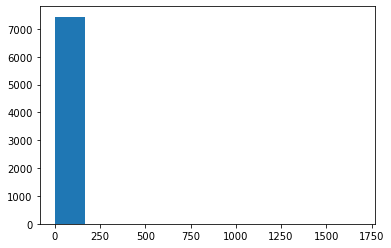

In [10]:
plt.hist(argo_obs.min_depth)
print(argo_obs.min_depth[argo_obs.min_depth>30])

(array([1046.,  548.,  344., 1370.,  685.,  183.,  343., 2894.,   40.,
           3.]),
 array([1.0000e+00, 1.3630e+02, 2.7160e+02, 4.0690e+02, 5.4220e+02,
        6.7750e+02, 8.1280e+02, 9.4810e+02, 1.0834e+03, 1.2187e+03,
        1.3540e+03]),
 <BarContainer object of 10 artists>)

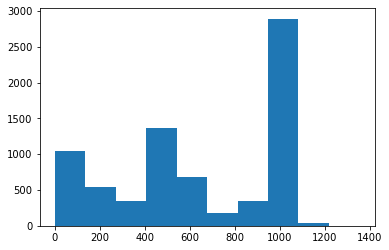

In [5]:
plt.hist(argo_obs.levels)

(array([ 124., 3761.,  650., 1624.,  373.,  394.,  486.,   42.]),
 array([ 0,  1,  2,  3,  5, 10, 20, 30, 40]),
 <BarContainer object of 8 artists>)

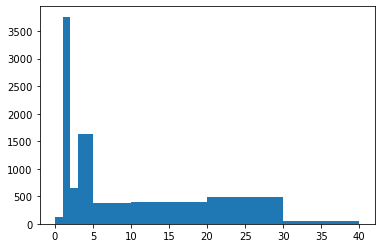

In [6]:
plt.hist((argo_obs.max_depth-argo_obs.min_depth)/argo_obs.levels,[0,1,2,3,5,10,20,30,40])

2023-12-03T06:11:15.000000000 -60.93 187.897
[1421.5035 1423.471  1425.4384 1427.4058 1429.3732 1431.3406 1433.3079
 1435.2751 1437.2426 1439.2098 1441.177  1443.1443 1445.1116 1447.0787
 1449.0459 1451.0132 1452.9803 1454.9474 1456.9146 1458.8817 1460.8488
 1462.8158 1464.7828 1466.7499 1468.7169 1470.6838 1472.6509 1474.6178
 1476.5847 1478.5516 1480.5186 1482.4855 1484.4524 1486.4192 1488.386
 1490.3528 1492.3196 1494.2864 1496.2532 1498.2198 1500.1866 1502.1533
 1504.12   1506.0867 1508.0532 1510.0199 1511.9865 1513.9531 1515.9197
 1517.8862 1519.8528 1521.8192 1523.7858 1525.7522 1527.7188 1529.6852
 1531.6516 1533.6179 1535.5844 1537.5508 1539.5171 1541.4834 1543.4497
 1545.416  1547.3823 1549.3485 1551.3148 1553.281  1555.2472 1557.2134
 1559.1796 1561.1458 1563.1118 1565.078  1567.0441 1569.0101 1570.9762
 1572.9423 1574.9082 1576.8743 1578.8402 1580.8062 1582.7721 1584.738
 1586.704  1588.6699 1590.6357 1592.6016 1594.5674 1596.5332 1598.499
 1600.4648 1602.4305 1604.3964 1606

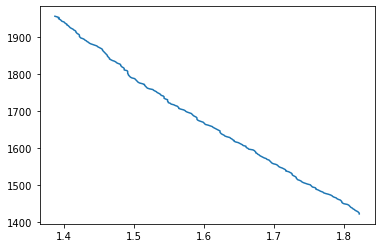

In [14]:
i=1249
print(argo_obs.time[i],argo_obs.lat[i],argo_obs.lon[i])
print(argo_obs.profiles[i].depth)
print(argo_obs.profiles[i].levels)
plt.plot(argo_obs.profiles[i].T, argo_obs.profiles[i].depth)

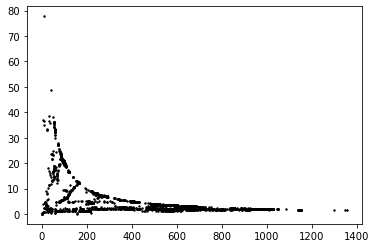

In [8]:
plt.scatter(
    argo_obs.levels,
    (argo_obs.max_depth-argo_obs.min_depth)/argo_obs.levels,
    s=2,color='black')

In [11]:
for i in range(len(argo_obs)):
    if argo_obs.min_depth[i]>200:
    # if argo_obs.levels[i]>100 and (argo_obs.max_depth[i]-argo_obs.min_depth[i])/argo_obs.levels[i]>20:
        print(i)

1249
1427
1434
1467
2021
3178
3463
4032
4504
5053
5523
5602
5693
5797
5965
6380
